In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import scatter
from mlxtend.evaluate import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
data = pd.read_csv('D:\\Data-science\\mushroom.csv')
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
data.drop_duplicates()
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

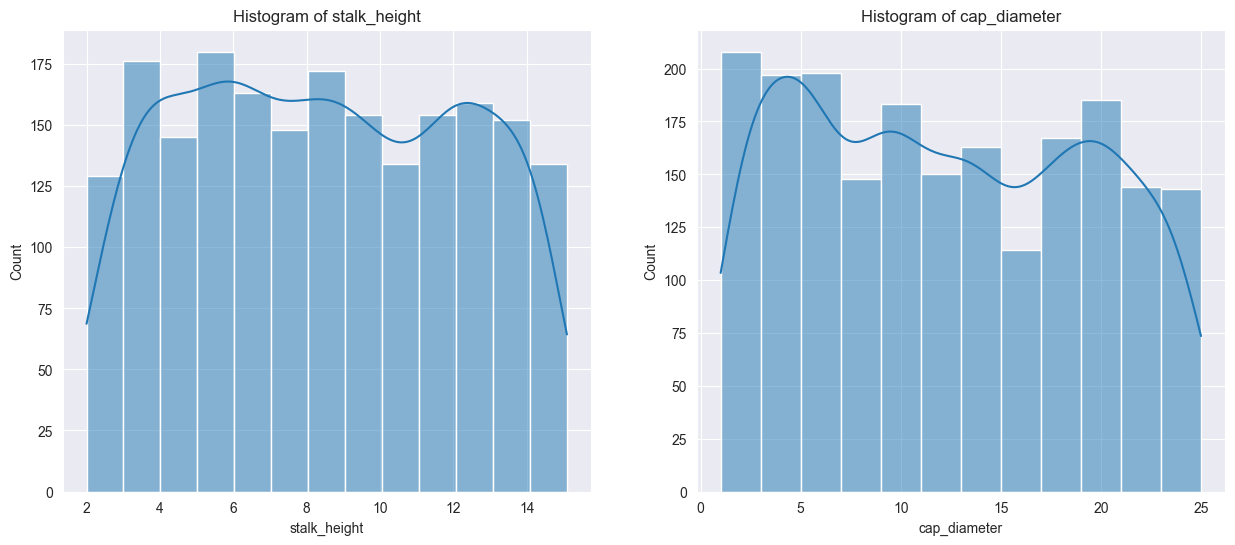

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data['stalk_height'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of stalk_height')
    
sns.histplot(data['cap_diameter'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of cap_diameter')
plt.show()

In [9]:
le = LabelEncoder()
encode_data = data.copy()

for column in encode_data.select_dtypes(include=['object']).columns:
    encode_data[column] = le.fit_transform(encode_data[column])
encode_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


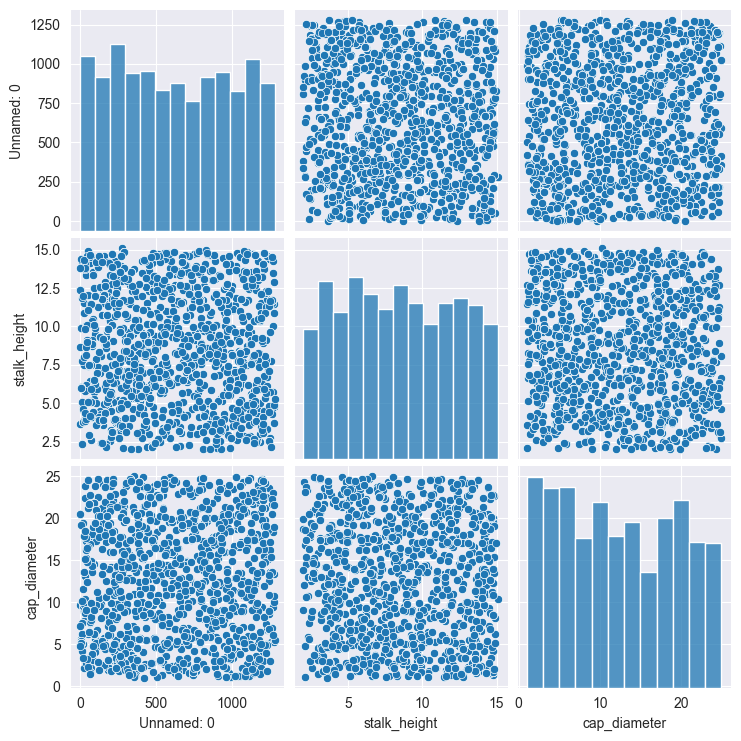

In [7]:
sns.pairplot(data)

In [10]:
x = encode_data.drop(columns=['Unnamed: 0'])
y = encode_data['Unnamed: 0']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

In [14]:
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [15]:
accuracy =accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.645
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         1
          34       1.00      1.00      1.00         1
          36       0.00      0.00      0.00         1
          40       1.00      1.00      1.0

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
svm_model = svm.SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_pca, y_train)

SVC(random_state=42)

In [18]:
y_pred = svm_model.predict(X_test_pca)

In [19]:
h = .02  # Step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train_pca[y == 0, 0], X_train_pca[y == 0, 1], color='red', label='Poisonous', alpha=0.5)
plt.scatter(X_train_pca[y == 1, 0], X_train_pca[y == 1, 1], color='green', label='Edible', alpha=0.5)

plt.title("SVM Classification Results on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()